In [2]:
import pandas as pd
import matplotlib.pyplot as plt


target_path = '/mnt/sda1/sherry/SGL-BiGNAS/BiGNAS-Attack/data/CD_Kitchen_for_Kitchen/raw/reviews_Home_and_Kitchen_5.json.gz'
source_path = '/mnt/sda1/sherry/SGL-BiGNAS/BiGNAS-Attack/data/CD_Kitchen_for_Kitchen/raw/reviews_CDs_and_Vinyl_5.json.gz'

# 讀取 Amazon 5-core 格式的 JSON.GZ
target_df = pd.read_json(target_path, lines=True, compression='gzip')
source_df = pd.read_json(source_path, lines=True, compression='gzip')


In [3]:
# 2️⃣ 確認有哪些欄位
print("Columns:", target_df.columns)

Columns: Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')


In [4]:
print(f"✅ Target domain 總 item 數量（ASIN 計算）: {target_df['asin'].nunique()}")

✅ Target domain 總 item 數量（ASIN 計算）: 28237


In [5]:
# 1️⃣ 取得各自 unique 的 reviewerID set
target_users = set(target_df['reviewerID'].unique())
source_users = set(source_df['reviewerID'].unique())

# 2️⃣ 計算 overlap
overlap_users = target_users.intersection(source_users)

# 3️⃣ 輸出結果
print(f"✅ Target domain 總 user 數: {len(target_users)}")
print(f"✅ Source domain 總 user 數: {len(source_users)}")
print(f"🎯 兩個 domain 都有出現的 user 數（去重複計算）: {len(overlap_users)}")


✅ Target domain 總 user 數: 66519
✅ Source domain 總 user 數: 75258
🎯 兩個 domain 都有出現的 user 數（去重複計算）: 2809


In [6]:
import pandas as pd

# 1️⃣ 找 overlap users
target_users = set(target_df['reviewerID'].unique())
source_users = set(source_df['reviewerID'].unique())
overlap_users = target_users.intersection(source_users)
print(f"✅ Overlap user 數量: {len(overlap_users)}")

# 2️⃣ 篩選 target_df，只保留 overlap users 的紀錄
target_overlap_df = target_df[target_df['reviewerID'].isin(overlap_users)].copy()
source_overlap_df = source_df[source_df['reviewerID'].isin(overlap_users)].copy()

# 3️⃣ 統計這些 user 買過的 asin 出現次數
item_counts = target_overlap_df['asin'].value_counts()

# 4️⃣ 加入排名（count 小 → 大）
item_counts_ranked = item_counts.rank(method='min', ascending=True).astype(int)

# 5️⃣ 合併成 DataFrame
item_stats = pd.DataFrame({
    'count': item_counts,
    'rank': item_counts_ranked
}).sort_values(by='count', ascending=True)

# 6️⃣ 取最冷門的 5 個
coldest_items = item_stats.head(5)

# 7️⃣ 取最熱門的 5 個（要重排一下）
hottest_items = item_stats.sort_values(by='count', ascending=False)

# 8️⃣ 印出結果
print("\n❄️ Overlap users 中最冷門的 5 個 target item（asin / count / rank）:")
print(coldest_items)

print("\n🔥 Overlap users 中最熱門的 5 個 target item（asin / count / rank）:")
print(hottest_items)


✅ Overlap user 數量: 2809

❄️ Overlap users 中最冷門的 5 個 target item（asin / count / rank）:
            count  rank
asin                   
B00CDPNA70      1     1
B000BOE0EC      1     1
B000BOK58C      1     1
B000BP351A      1     1
B000BP7LK6      1     1

🔥 Overlap users 中最熱門的 5 個 target item（asin / count / rank）:
            count   rank
asin                    
B005M8HPPS    107  14274
B00004OCO9    106  14273
B00006JSUA     78  14272
B00DUHACEE     75  14271
B00608YG7E     62  14270
...           ...    ...
B001A64A5O      1      1
B001A6E91E      1      1
B0019X3I3S      1      1
B001C54DW8      1      1
B00CE1PQDE      1      1

[14274 rows x 2 columns]


In [7]:
# 統計出現次數分佈
count_distribution = item_counts.value_counts().sort_index()

# 改掉 Series 名稱，避免與 index 名稱衝突
count_distribution.name = 'num_items'

# 轉成 DataFrame
count_distribution_df = count_distribution.reset_index()
count_distribution_df.columns = ['count', 'num_items']

print(count_distribution_df)


    count  num_items
0       1       7316
1       2       2967
2       3       1383
3       4        757
4       5        457
5       6        345
6       7        239
7       8        155
8       9        124
9      10         92
10     11         75
11     12         57
12     13         44
13     14         36
14     15         30
15     16         27
16     17         17
17     18         29
18     19         14
19     20          7
20     21         16
21     22          7
22     23          8
23     24          8
24     25         10
25     26         12
26     27          2
27     28          4
28     29          5
29     30          3
30     31          2
31     32          3
32     33          1
33     34          1
34     35          1
35     36          1
36     37          2
37     38          1
38     40          3
39     41          1
40     42          1
41     43          3
42     44          1
43     51          1
44     52          1
45     62          1
46     75    

In [8]:
# !pip install gdown


In [9]:
# !gdown --id 1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_

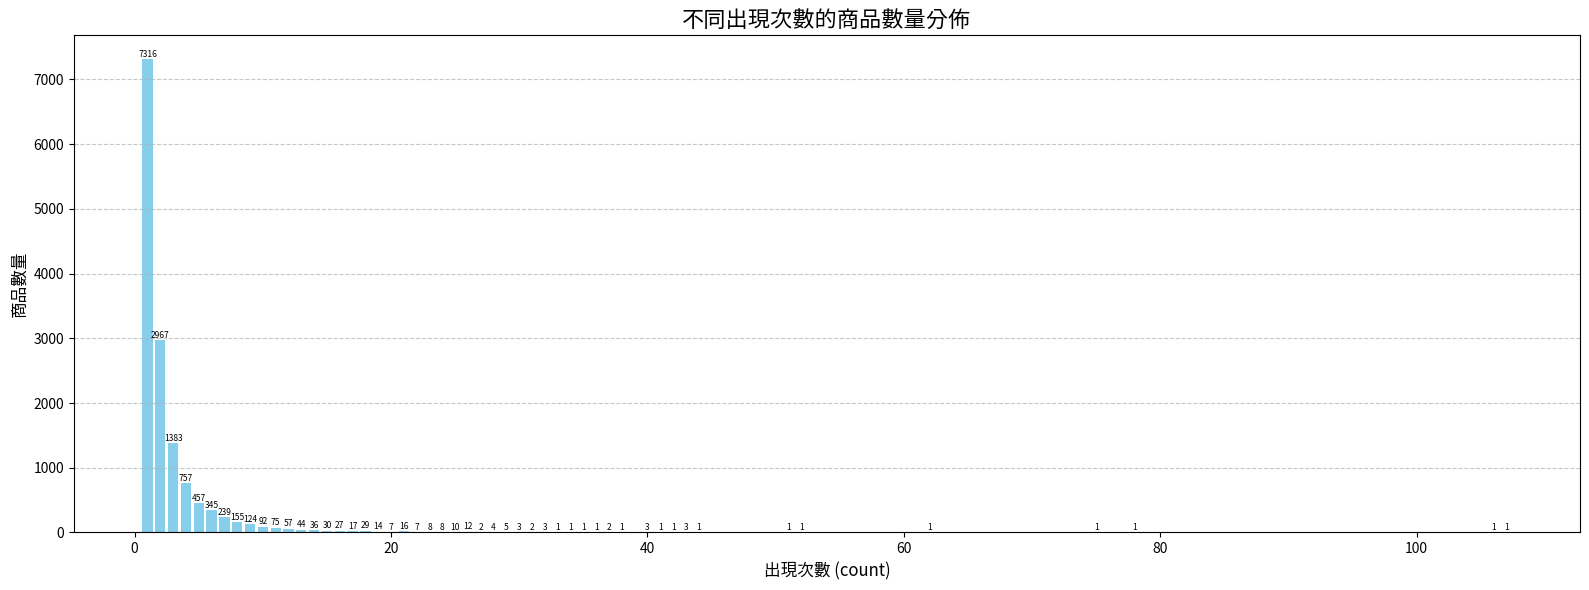

In [11]:
import matplotlib.pyplot as plt
import matplotlib

# 註冊字型並套用
matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

# 畫長條圖（全區間）
plt.figure(figsize=(16, 6))
bars = plt.bar(count_distribution_df['count'], count_distribution_df['num_items'], color='skyblue')

# 在每個長條上標數字
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5,
             f'{int(height)}', ha='center', va='bottom', fontsize=6)

# 標題與標籤
plt.title('不同出現次數的商品數量分佈', fontsize=16)
plt.xlabel('出現次數 (count)', fontsize=12)
plt.ylabel('商品數量', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



In [12]:
import torch
import pandas as pd

# 載入 data.pt
data_list = torch.load("/mnt/sda1/sherry/SGL-BiGNAS/BiGNAS-Attack/data/CD_Kitchen_for_Kitchen/processed/data.pt", weights_only=False, map_location="cpu")
data = data_list[0]

# 從 data.pt 取出 splits
train_pt = data.target_train_edge_index.t().numpy()
valid_pt = data.target_valid_edge_index.t().numpy()
test_pt  = data.target_test_edge_index.t().numpy()

# 載入 CSV
train_csv = pd.read_csv("/mnt/sda1/sherry/SGL-BiGNAS/BiGNAS-Attack/logs/split_edges/target_train_edge_index.csv", names=["user", "item"])
valid_csv = pd.read_csv("/mnt/sda1/sherry/SGL-BiGNAS/BiGNAS-Attack/logs/split_edges/target_valid_edge_index.csv", names=["user", "item"])
test_csv  = pd.read_csv("/mnt/sda1/sherry/SGL-BiGNAS/BiGNAS-Attack/logs/split_edges/target_test_edge_index.csv", names=["user", "item"])

train_csv_np = train_csv.to_numpy()
valid_csv_np = valid_csv.to_numpy()
test_csv_np  = test_csv.to_numpy()

# 比對
print("Train equal:", (train_pt == train_csv_np).all(), "Shapes:", train_pt.shape, train_csv_np.shape)
print("Valid equal:", (valid_pt == valid_csv_np).all(), "Shapes:", valid_pt.shape, valid_csv_np.shape)
print("Test equal:",  (test_pt  == test_csv_np).all(), "Shapes:", test_pt.shape, test_csv_np.shape)


/home/sherry/.local/lib/python3.11/site-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /home/sherry/.local/lib/python3.11/site-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/home/sherry/.local/lib/python3.11/site-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /home/sherry/.local/lib/python3.11/site-packages/torch_cluster/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/home/sherry/.local/lib/python3.11/site-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /home/sherry/.local/lib/python3.11/site-packages/torch_spline_con

Train equal: True Shapes: (31941, 2) (31941, 2)
Valid equal: True Shapes: (2809, 2) (2809, 2)
Test equal: True Shapes: (2809, 2) (2809, 2)


In [13]:
# 9️⃣ 篩選 count 為 10 的所有 items
count_10_items = item_stats[item_stats['count'] == 10]
print("\n🔍 Overlap users 中 count = 10 的 target items（asin / count / rank）:")
print(count_10_items)



🔍 Overlap users 中 count = 10 的 target items（asin / count / rank）:
            count   rank
asin                    
B000064841     10  13744
B0007Y9WHQ     10  13744
B000NQ925K     10  13744
B004Y4GWRS     10  13744
B00005LA9F     10  13744
...           ...    ...
B004S67UHS     10  13744
B000BRLXUI     10  13744
B000CO89T8     10  13744
B000063UZS     10  13744
B0091SFDAO     10  13744

[92 rows x 2 columns]


查詢asin對應index

In [15]:
import pandas as pd

# 讀取 CSV
csv_path = '/mnt/sda1/sherry/BiGNAS-Attack/data/CD_Kitchen_for_Kitchen/processed/target_item_global_index_map.csv'
df = pd.read_csv(csv_path)

# 查詢最熱門商品 asin
most_popular_asin = 'B000064841'  # 你需要事先找到這個 asin

# 查詢對應 index
result = df[df['asin'] == most_popular_asin]['global_item_id']

if not result.empty:
    target_item_id = result.values[0]
    print(f"✅ ASIN {most_popular_asin} → Index {target_item_id}")
else:
    print(f"❌ ASIN {most_popular_asin} 不在對應表中")


✅ ASIN B000064841 → Index 3081


In [ ]:
import torch

data = torch.load(
    '/mnt/sda1/sherry/BiGNAS/data/CD_Kitchen_for_Kitchen/processed/data.pt',
    weights_only=False  # ✅ 明確關閉安全限制
)
print(data)


/home/sherry/.local/lib/python3.11/site-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /home/sherry/.local/lib/python3.11/site-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/home/sherry/.local/lib/python3.11/site-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /home/sherry/.local/lib/python3.11/site-packages/torch_cluster/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/home/sherry/.local/lib/python3.11/site-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /home/sherry/.local/lib/python3.11/site-packages/torch_spline_con

[Data(
  source_label=[53995],
  source_link=[2, 53995],
  target_label=[37559],
  target_link=[2, 37559],
  split_mask={
    train=[37559],
    valid=[37559],
    test=[37559],
  },
  num_users=2809,
  num_source_items=28253,
  num_target_items=14274,
  raw_overlap_users=[2809],
  target_train_edge_index=[2, 31941],
  target_valid_edge_index=[2, 2809],
  target_test_edge_index=[2, 2809],
  target_id2asin={
    2809='B00004SY7L',
    2810='B00004R941',
    2811='B00004RFKS',
    2812='B00004SGG6',
    2813='B00004SGFG',
    2814='B00004OCKG',
    2815='B00004OCKU',
    2816='B00004SGFI',
    2817='B00004OCJG',
    2818='B00004S7V8',
    2819='B00004SU16',
    2820='B00004RFKD',
    2821='B00004S9GX',
    2822='B00004SPCY',
    2823='B00004SY9L',
    2824='B00004SU17',
    2825='B00004SC50',
    2826='B00004SGFU',
    2827='B00004S9H9',
    2828='B00004SGE2',
    2829='B00004S7V7',
    2830='B00004SGDL',
    2831='B00004RHNF',
    2832='B00004RDD4',
    2833='B00004SPDH',
    2834='B000

In [ ]:
# 取出 Data 物件
d = data[0]

# 讀取 target domain 的 user-item edge
edge_index = d.target_link.cpu()  # shape: [2, num_edges]

user_indices = edge_index[0]  # 使用者
item_indices = edge_index[1]  # 商品

# 指定 item_id
item_id = 3080 # 你要查的商品節點 ID

# 找出買過這個 item 的使用者
buyers = user_indices[item_indices == item_id].unique()

print(f"👥 有 {len(buyers)} 位 user 買過 item_id = {item_id}")
print("user_index 列表：", buyers.tolist())


👥 有 10 位 user 買過 item_id = 3080
user_index 列表： [50, 98, 118, 191, 260, 550, 735, 947, 1175, 1615]


In [ ]:
# 取出唯一的 Data 物件
d = data[0]

# 假設要查的 user ID
target_user_id = 1615  

# 從 target domain 取出 user-item 關係
edge_index = d.target_link.cpu()  # shape: [2, num_edges]

user_indices = edge_index[0]  # 使用者編號
item_indices = edge_index[1]  # 商品編號

# 找出該 user 買過的所有 item
items_bought = item_indices[user_indices == target_user_id].unique()

print(f"🛒 user {target_user_id} 買過 {len(items_bought)} 個商品")
print("商品編號列表：", items_bought.tolist())



🛒 user 1615 買過 6 個商品
商品編號列表： [3080, 4810, 5993, 16911, 16916, 16920]


In [ ]:
import torch
import pandas as pd
from pathlib import Path

# ========= 0) 參數 =========
DATA_PT = '/mnt/sda1/sherry/BiGNAS/data/CD_Kitchen_for_Kitchen/processed/data.pt'
SOURCE_ITEM_MAP_CSV = '/mnt/sda1/sherry/BiGNAS/data/CD_Kitchen_for_Kitchen/processed/source_item_global_index_map.csv'
OUT_CSV = '/mnt/sda1/sherry/BiGNAS/analysis_source_item_groupA_groupB_counts.csv'

# 你提供的 groupA
groupA_user_ids = [50, 98, 118, 191, 260, 550, 735, 947, 1175, 1615]

# ========= 1) 載入資料（取 source domain 連邊）=========
data = torch.load(DATA_PT, weights_only=False)
d = data[0]

edge_index = d.source_link.cpu()   # [2, num_edges]
user_indices = edge_index[0]
item_indices = edge_index[1]

# ========= 2) 建立 groupA / groupB =========
all_source_users = set(user_indices.numpy().tolist())
groupA_set = set(groupA_user_ids)
# 只保留實際存在於 source 的 user
groupA_set = groupA_set & all_source_users

groupB_set = all_source_users - groupA_set

print(f"✅ source 總使用者數: {len(all_source_users)}")
print(f"✅ groupA 使用者數: {len(groupA_set)}（你提供: {len(groupA_user_ids)}）")
print(f"✅ groupB 使用者數: {len(groupB_set)}（其餘使用者）")

# ========= 3) 準備去重後的 user-item 紀錄 =========
df = pd.DataFrame({
    "user": user_indices.numpy(),
    "item": item_indices.numpy(),
})
df_unique = df.drop_duplicates(subset=["user", "item"])

# ========= 4) 分組計數：每個 item 被多少不同使用者購買 =========
df_A = df_unique[df_unique["user"].isin(groupA_set)]
df_B = df_unique[df_unique["user"].isin(groupB_set)]

count_A = df_A.groupby("item")["user"].nunique().rename("groupA_buyers")
count_B = df_B.groupby("item")["user"].nunique().rename("groupB_buyers")

result = pd.merge(count_A.reset_index(), count_B.reset_index(), on="item", how="outer").fillna(0)
result["groupA_buyers"] = result["groupA_buyers"].astype(int)
result["groupB_buyers"] = result["groupB_buyers"].astype(int)
result["total_buyers"]  = result["groupA_buyers"] + result["groupB_buyers"]

# ========= 5)（可選）連結 source item 的 ASIN 對照 =========
map_path = Path(SOURCE_ITEM_MAP_CSV)
if map_path.exists():
    map_df = pd.read_csv(map_path)
    if "global_index" in map_df.columns:
        result = result.merge(
            map_df[["global_index", "asin"]].rename(columns={"global_index": "item"}),
            on="item", how="left"
        )
        cols = ["item", "asin", "groupA_buyers", "groupB_buyers", "total_buyers"]
        result = result[cols]
    else:
        print("⚠️ 對照表缺少 'global_index' 欄位，跳過 ASIN 連結。")
else:
    print("ℹ️ 找不到 source_item_global_index_map.csv，僅輸出 item 索引統計。")

# ========= 6) 排序、顯示、輸出 =========
result = result.sort_values("total_buyers", ascending=False).reset_index(drop=True)

# Jupyter 直接顯示前 20 筆（或改成 display(result) 顯示全部）
result.head(20)

# 輸出 CSV
result.to_csv(OUT_CSV, index=False)
print(f"✅ 已輸出：{OUT_CSV}")


✅ source 總使用者數: 2722
✅ groupA 使用者數: 10（你提供: 10）
✅ groupB 使用者數: 2712（其餘使用者）
✅ 已輸出：/mnt/sda1/sherry/BiGNAS/analysis_source_item_groupA_groupB_counts.csv


In [ ]:
import math
import numpy as np
import torch
import torch.nn.functional as F

# 路徑
DATA_PT  = "/mnt/sda1/sherry/BiGNAS/data/CD_Kitchen_for_Kitchen/processed/data.pt"
ITEM_EMB = "/mnt/sda1/sherry/BiGNAS-Attack/source_item_embedding.npy"   # 你已存好的「來源域商品」embedding
ITEM_ID  = 3080
TOP_RATIO = 0.10
BATCH_B  = 8192

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# ---- 讀 data.pt（PyTorch 2.6 安全載入）----
from torch.serialization import add_safe_globals
try:
    from torch_geometric.data.data import DataEdgeAttr
    add_safe_globals([DataEdgeAttr])
except Exception:
    pass

data_list = torch.load(DATA_PT, map_location=device, weights_only=False)
d = data_list[0]
num_users        = int(d.num_users)
num_source_items = int(d.num_source_items)
num_target_items = int(d.num_target_items)
print(f"[data] users={num_users}, source_items={num_source_items}, target_items={num_target_items}")

# 1) 載入「來源域商品嵌入」
item_emb_np = np.load(ITEM_EMB)                          # shape: [num_source_items, emb_dim]
assert item_emb_np.shape[0] == num_source_items, \
    f"item_emb 個數({item_emb_np.shape[0]}) != num_source_items({num_source_items})"
item_emb = torch.tensor(item_emb_np, dtype=torch.float32, device=device)

# 2) 由來源域互動把「商品嵌入」聚合成「使用者嵌入」（平均池化）
#    source_link 的第二行是 global item index（通常 = num_users + source_item_local）
if hasattr(d, "source_link"):
    e = d.source_link.to(device)               # [2, E_s]
elif hasattr(d, "source_edge_index"):
    e = d.source_edge_index.to(device)
else:
    raise AttributeError("data 內找不到 source_link/source_edge_index。")

u = e[0].to(torch.long)                        # user global index
v = e[1].to(torch.long)                        # item global index
src_local = v - num_users                      # 轉回來源域 item 的 local index
valid = (src_local >= 0) & (src_local < num_source_items)
u = u[valid]; src_local = src_local[valid]

# 對每個 (u, i_local) 聚合 item_emb[i_local] 的「總和」與「個數」，最後 user_sum / user_cnt
emb_dim = item_emb.size(1)
user_sum = torch.zeros((num_users, emb_dim), dtype=torch.float32, device=device)
user_cnt = torch.zeros((num_users,), dtype=torch.float32, device=device)

user_sum.index_add_(0, u, item_emb[src_local])               # sum over items
user_cnt.index_add_(0, u, torch.ones_like(u, dtype=torch.float32))

# 避免除 0：對沒有來源互動的 user，user_cnt=0，令其嵌入為 0 向量
user_cnt_safe = torch.clamp(user_cnt, min=1.0)
source_user_embs = user_sum / user_cnt_safe.unsqueeze(1)     # [num_users, emb_dim]

print("source_user_embs (pooled) shape:", tuple(source_user_embs.shape))

# 3) 定義 Group A / B（target domain，誰買過 ITEM_ID）
edge_t = d.target_link.to(device)
user_t = edge_t[0].to(torch.long)
item_t = edge_t[1].to(torch.long)
groupA = user_t[item_t == int(ITEM_ID)].unique().to(torch.long).sort().values
if groupA.numel() == 0:
    raise ValueError(f"No buyers for ITEM_ID={ITEM_ID} in target domain.")

all_users = torch.arange(num_users, device=device)
maskB = torch.ones(num_users, dtype=torch.bool, device=device)
maskB[groupA] = False
groupB = all_users[maskB]
print(f"Group A: {groupA.numel()} users, Group B: {groupB.numel()} users")

# 4) cosine 距離（使用 pooled user embeddings）
A = F.normalize(source_user_embs[groupA], p=2, dim=1)
B = F.normalize(source_user_embs[groupB], p=2, dim=1)

with torch.no_grad():
    min_dist = torch.empty(B.size(0), dtype=torch.float32, device=device)
    for s in range(0, B.size(0), BATCH_B):
        e = min(s + BATCH_B, B.size(0))
        sim_chunk = B[s:e] @ A.T
        max_sim, _ = sim_chunk.max(dim=1)
        min_dist[s:e] = torch.clamp(1.0 - max_sim, 0.0, 1.0)

# 5) Hard Users：距離最大的前 TOP_RATIO（無條件捨去）
nB = min_dist.numel()
k  = max(1, math.floor(TOP_RATIO * nB))
top_vals, top_idx = torch.topk(min_dist, k, largest=True, sorted=True)
hard_users = groupB[top_idx]

print(f"\n👤 Hard Users (Top {int(TOP_RATIO*100)}%, floor): {k}/{nB}")
print("user_id 列表：", hard_users.tolist())
print("\nTop Hard Users（含距離）:")
for u_id, dval in zip(hard_users.tolist(), top_vals.tolist()):
    print(f"user {u_id}\tmin_cosine_distance = {dval:.4f}")


[data] users=2809, source_items=28253, target_items=14274
source_user_embs (pooled) shape: (2809, 32)
Group A: 10 users, Group B: 2799 users

👤 Hard Users (Top 10%, floor): 279/2799
user_id 列表： [390, 568, 1004, 1010, 1196, 1301, 1564, 1700, 1715, 1724, 1827, 1829, 1886, 1968, 1987, 2019, 2105, 2171, 2185, 2203, 2223, 2243, 2245, 2246, 2252, 2267, 2269, 2286, 2298, 2317, 2325, 2348, 2381, 2385, 2409, 2418, 2427, 2434, 2463, 2483, 2499, 2506, 2512, 2519, 2520, 2528, 2531, 2538, 2544, 2546, 2556, 2563, 2566, 2578, 2600, 2602, 2603, 2609, 2620, 2622, 2627, 2631, 2642, 2669, 2678, 2684, 2687, 2697, 2717, 2722, 2728, 2743, 2760, 2762, 2767, 2774, 2776, 2779, 2780, 2782, 2787, 2790, 2795, 2800, 2802, 2807, 2808, 1608, 1572, 2294, 2366, 2041, 2044, 540, 817, 327, 2307, 543, 2553, 1082, 765, 415, 900, 2716, 1699, 496, 33, 2227, 997, 2618, 452, 563, 26, 1640, 1551, 450, 330, 1431, 384, 84, 1232, 934, 335, 908, 418, 1506, 1263, 1517, 2501, 514, 919, 423, 949, 2073, 2039, 1182, 681, 1716, 2727, 10

In [ ]:
import torch
import torch.nn.functional as F

def find_hard_users_quantile(source_user_embs: torch.Tensor,
                             group_A_user_ids: torch.LongTensor,
                             top_ratio: float = 0.10):
    """
    完全對齊你提供的版本：normalize → 相似度矩陣 → 距離=1-相似度 → min over A → 用 quantile 當門檻
    回傳：
      hard_user_ids: Group B 中被挑選為 hard user 的使用者 id（未排序）
      min_dist_per_B_user: 每個 B 使用者的最小距離（與最近 A 使用者）
    """
    device = source_user_embs.device
    num_users = source_user_embs.size(0)
    all_user_ids = torch.arange(num_users, device=device)

    group_B_mask = ~torch.isin(all_user_ids, group_A_user_ids.to(device))
    group_B_user_ids = all_user_ids[group_B_mask]

    A = F.normalize(source_user_embs[group_A_user_ids], p=2, dim=1)
    B = F.normalize(source_user_embs[group_B_user_ids], p=2, dim=1)

    cosine_sim = B @ A.T
    cosine_dist = 1 - cosine_sim

    min_dist_per_B_user, _ = torch.min(cosine_dist, dim=1)

    threshold = torch.quantile(min_dist_per_B_user, 1 - top_ratio)
    hard_mask = min_dist_per_B_user >= threshold
    hard_user_ids = group_B_user_ids[hard_mask]

    return hard_user_ids, min_dist_per_B_user


def find_hard_users_topk_floor(source_user_embs: torch.Tensor,
                               group_A_user_ids: torch.LongTensor,
                               top_ratio: float = 0.10):
    """
    與上面計算過程相同，但選 hard user 規則改為「前 10% 無條件捨去」。
    """
    device = source_user_embs.device
    num_users = source_user_embs.size(0)
    all_user_ids = torch.arange(num_users, device=device)

    group_B_mask = ~torch.isin(all_user_ids, group_A_user_ids.to(device))
    group_B_user_ids = all_user_ids[group_B_mask]

    A = F.normalize(source_user_embs[group_A_user_ids], p=2, dim=1)
    B = F.normalize(source_user_embs[group_B_user_ids], p=2, dim=1)

    cosine_sim = B @ A.T
    min_dist_per_B_user = 1 - cosine_sim.max(dim=1).values  # 同等於先算距離再取最小

    nB = min_dist_per_B_user.numel()
    k = max(1, int(nB * top_ratio))   # 無條件捨去
    top_vals, top_idx = torch.topk(min_dist_per_B_user, k, largest=True, sorted=True)
    hard_user_ids = group_B_user_ids[top_idx]
    return hard_user_ids, min_dist_per_B_user, top_vals


In [ ]:
# 量化差異
hard_q, dist_q = find_hard_users_quantile(source_user_embs, buyers, top_ratio=0.10)
hard_k, dist_k, top_vals_k = find_hard_users_topk_floor(source_user_embs, buyers, top_ratio=0.10)

print("Quantile 方式 hard users 個數:", hard_q.numel())
print("Top-k floor 方式 hard users 個數:", hard_k.numel())

# 兩種選法的交集/差集（如果規則不同，這邊本來就會有差）
inter = set(hard_q.tolist()) & set(hard_k.tolist())
print("兩者交集人數:", len(inter), " / quantile-only:", hard_q.numel()-len(inter), " / topk-only:", hard_k.numel()-len(inter))

# 距離是否一致（應該一致；若你把 user 向量來源換掉就會不同）
max_abs_diff = (dist_q - (1 - (F.normalize(source_user_embs[~torch.isin(torch.arange(source_user_embs.size(0), device=source_user_embs.device), buyers.to(source_user_embs.device))], p=2, dim=1) @ F.normalize(source_user_embs[buyers], p=2, dim=1).T).max(dim=1).values)).abs().max().item()
print(f"最小距離的最大絕對差：{max_abs_diff:.6f}")


Quantile 方式 hard users 個數: 280
Top-k floor 方式 hard users 個數: 279
兩者交集人數: 279  / quantile-only: 1  / topk-only: 0
最小距離的最大絕對差：0.000000


In [ ]:
# 將 user_id 與距離值配對，並依 user_id 排序
user_distance_pairs = list(zip(hard_users.tolist(), top_vals.tolist()))
user_distance_pairs.sort(key=lambda x: x[0])  # 按 user_id 升序

print("user_id 列表（含距離，按ID排序）:")
for u_id, dist in user_distance_pairs:
    print(f"user {u_id}\tmin_cosine_distance = {dist:.4f}")


user_id 列表（含距離，按ID排序）:
user 26	min_cosine_distance = 0.7936
user 33	min_cosine_distance = 0.8089
user 40	min_cosine_distance = 0.7302
user 51	min_cosine_distance = 0.7306
user 67	min_cosine_distance = 0.6259
user 70	min_cosine_distance = 0.7467
user 71	min_cosine_distance = 0.6886
user 80	min_cosine_distance = 0.6284
user 84	min_cosine_distance = 0.7845
user 85	min_cosine_distance = 0.6466
user 96	min_cosine_distance = 0.6941
user 101	min_cosine_distance = 0.6720
user 136	min_cosine_distance = 0.6809
user 187	min_cosine_distance = 0.7186
user 198	min_cosine_distance = 0.6692
user 210	min_cosine_distance = 0.6920
user 212	min_cosine_distance = 0.7054
user 215	min_cosine_distance = 0.6857
user 218	min_cosine_distance = 0.6213
user 239	min_cosine_distance = 0.6381
user 245	min_cosine_distance = 0.7210
user 254	min_cosine_distance = 0.6857
user 256	min_cosine_distance = 0.6247
user 288	min_cosine_distance = 0.6721
user 296	min_cosine_distance = 0.6256
user 323	min_cosine_distance = 0.6465


In [ ]:
print("\nTop Hard Users（含距離）:")
max_print = 279
for u_id, dval in zip(hard_users.tolist()[:max_print], top_vals.tolist()[:max_print]):
    print(f"user {u_id}\tmin_cosine_distance = {dval:.4f}")



Top Hard Users（含距離）:
user 390	min_cosine_distance = 1.0000
user 568	min_cosine_distance = 1.0000
user 1004	min_cosine_distance = 1.0000
user 1010	min_cosine_distance = 1.0000
user 1196	min_cosine_distance = 1.0000
user 1301	min_cosine_distance = 1.0000
user 1564	min_cosine_distance = 1.0000
user 1700	min_cosine_distance = 1.0000
user 1715	min_cosine_distance = 1.0000
user 1724	min_cosine_distance = 1.0000
user 1827	min_cosine_distance = 1.0000
user 1829	min_cosine_distance = 1.0000
user 1886	min_cosine_distance = 1.0000
user 1968	min_cosine_distance = 1.0000
user 1987	min_cosine_distance = 1.0000
user 2019	min_cosine_distance = 1.0000
user 2105	min_cosine_distance = 1.0000
user 2171	min_cosine_distance = 1.0000
user 2185	min_cosine_distance = 1.0000
user 2203	min_cosine_distance = 1.0000
user 2223	min_cosine_distance = 1.0000
user 2243	min_cosine_distance = 1.0000
user 2245	min_cosine_distance = 1.0000
user 2246	min_cosine_distance = 1.0000
user 2252	min_cosine_distance = 1.0000
user 

In [ ]:
import math
import torch

assert groupB.numel() == min_distances.numel(), "groupB 與 min_distances 長度需一致"

# 可選：處理極端值/NaN，並夾到 [0,1]
dist = torch.clamp(torch.nan_to_num(min_distances, nan=1.0), 0.0, 1.0)

nB = dist.numel()
k = max(1, math.floor(0.10 * nB))  # 前 10%，至少 1 人（無條件捨去）

# 取距離最大者（Hard Users）
top_vals, top_idx = torch.topk(dist, k, largest=True, sorted=True)
hard_users = groupB[top_idx]  # 使用者 ID 與距離一一對應

# 輸出使用者清單
print(f"👤 Hard Users（前 10%）：{k}/{nB} 人")
hard_user_ids = hard_users.tolist()
print("user_id 列表：", hard_user_ids)

# 同時檢視距離值
print("\nTop Hard Users（含距離）:")
for u, d in zip(hard_users.tolist(), top_vals.tolist()):
    print(f"user {u}\tmin_cosine_distance = {d:.4f}")



NameError: name 'min_distances' is not defined

In [ ]:
import pandas as pd

user_path = '/mnt/sda1/sherry/BiGNAS/data/CD_Kitchen_for_Kitchen/processed/user_global_index_map.csv'
user_map_df = pd.read_csv(user_path)
reviewer2index = dict(zip(user_map_df['reviewerID'], user_map_df['user_index']))

# 統計 & 合併
target_user_counts = target_overlap_df.groupby('reviewerID').size()
source_user_counts = source_overlap_df.groupby('reviewerID').size()
target_user_counts = target_user_counts.reindex(overlap_users, fill_value=0)
source_user_counts = source_user_counts.reindex(overlap_users, fill_value=0)

interaction_df = pd.DataFrame({
    'source_count': source_user_counts,
    'target_count': target_user_counts
}).sort_values(by='target_count', ascending=False)

# reviewerID → user_index 映射
interaction_df = interaction_df.copy()
interaction_df['user_index'] = interaction_df.index.map(reviewer2index)
interaction_df = interaction_df.set_index('user_index')
interaction_df = interaction_df.sort_values(by='source_count', ascending=True)


# 顯示前10筆
print("📊 Overlap Users 的互動次數（user_index 為索引）前10筆：")
print(interaction_df.head(10))

# interaction_df.to_csv('overlap_user_interactions_sorted.csv')


📊 Overlap Users 的互動次數（user_index 為索引）前10筆：
            source_count  target_count
user_index                            
1004                   5             7
742                    5             6
1299                   5             5
1393                   5             5
1295                   5             5
1580                   5            10
1589                   5             6
2045                   5            10
878                    5            10
9                      5            19


In [ ]:
import pandas as pd

# 1️⃣ 載入原始資料與映射表
user_id = 'A15OGDJS69EUCP'
user_items = source_df[source_df['reviewerID'] == user_id]['asin'].tolist()

# 載入 source domain 的 asin → global index 對照表
source_map_path = '/mnt/sda1/sherry/BiGNAS/data/CD_Kitchen_for_Kitchen/processed/source_item_global_index_map.csv'
source_map_df = pd.read_csv(source_map_path)

# 建立 asin → index 映射字典
asin2index = dict(zip(source_map_df['asin'], source_map_df['global_index']))

# 2️⃣ 將 asin 轉換為 index（只保留有映射的部分）
user_item_indices = [asin2index[asin] for asin in user_items if asin in asin2index]

# 3️⃣ 顯示轉換後的結果
print(f"✅ Seed user {user_id} source domain行為數量: {len(user_item_indices)}（已轉為 global index）")
print(f"🔢 Index 列表: {user_item_indices}")


✅ Seed user A15OGDJS69EUCP source domain行為數量: 88（已轉為 global index）
🔢 Index 列表: [30458, 13926, 6605, 6978, 12510, 18405, 10424, 5469, 3607, 4896, 5870, 29583, 5758, 6991, 10394, 21621, 8526, 8216, 10398, 8787, 9131, 16111, 12192, 12442, 9718, 9840, 10340, 10414, 11010, 17135, 14298, 11683, 11511, 12457, 11967, 27708, 12292, 12118, 15750, 14071, 19903, 13394, 12791, 12923, 14278, 14945, 14903, 14527, 13672, 14241, 14090, 17266, 14234, 18631, 14877, 14509, 14551, 14550, 16139, 14844, 17858, 15457, 14980, 15491, 15225, 17057, 17032, 15633, 22124, 17437, 17188, 16401, 16419, 16782, 17690, 28651, 19767, 22470, 19151, 25140, 19706, 21385, 20152, 21585, 22454, 22755, 30914, 25377]


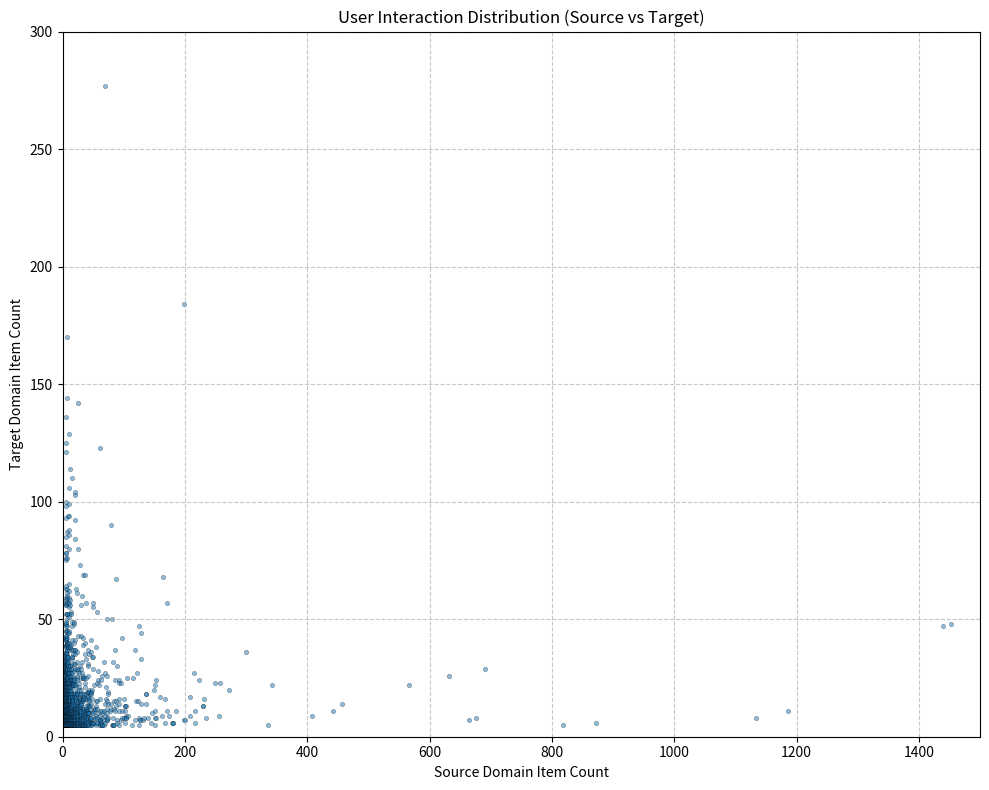

In [ ]:
import matplotlib.pyplot as plt

x = interaction_df['source_count']
y = interaction_df['target_count']

plt.figure(figsize=(10, 8))  # 放大整體圖
plt.scatter(x, y, s=10, alpha=0.5, edgecolors='k', linewidths=0.3)  # s=點大小

plt.xlabel('Source Domain Item Count')
plt.ylabel('Target Domain Item Count')
plt.title('User Interaction Distribution (Source vs Target)')
plt.grid(True, linestyle='--', alpha=0.7)

# 如果要放大比例區間（例如最多只看 50）
plt.xlim(0, 1500)
plt.ylim(0, 300)

plt.tight_layout()
plt.show()


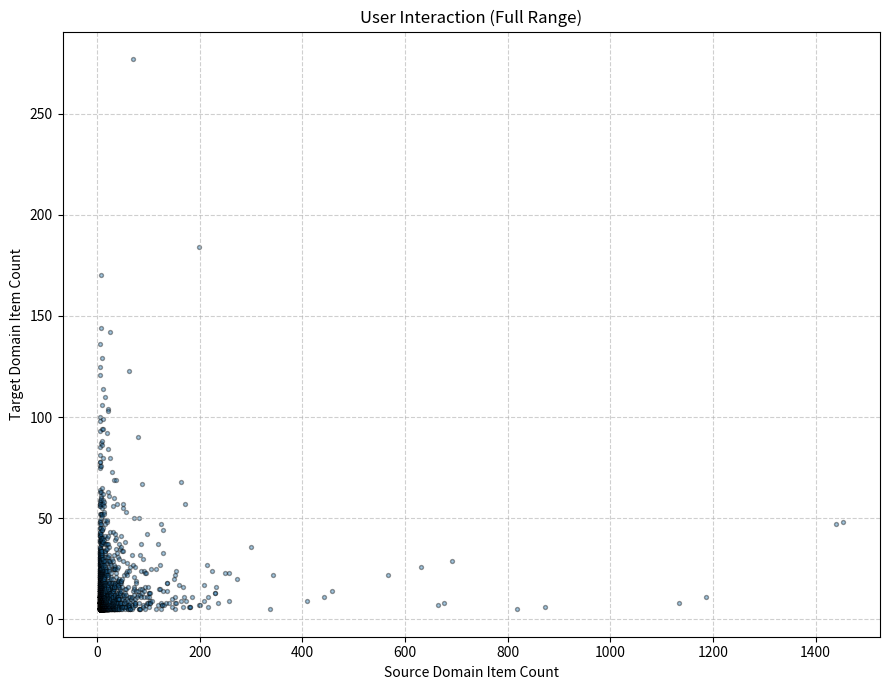

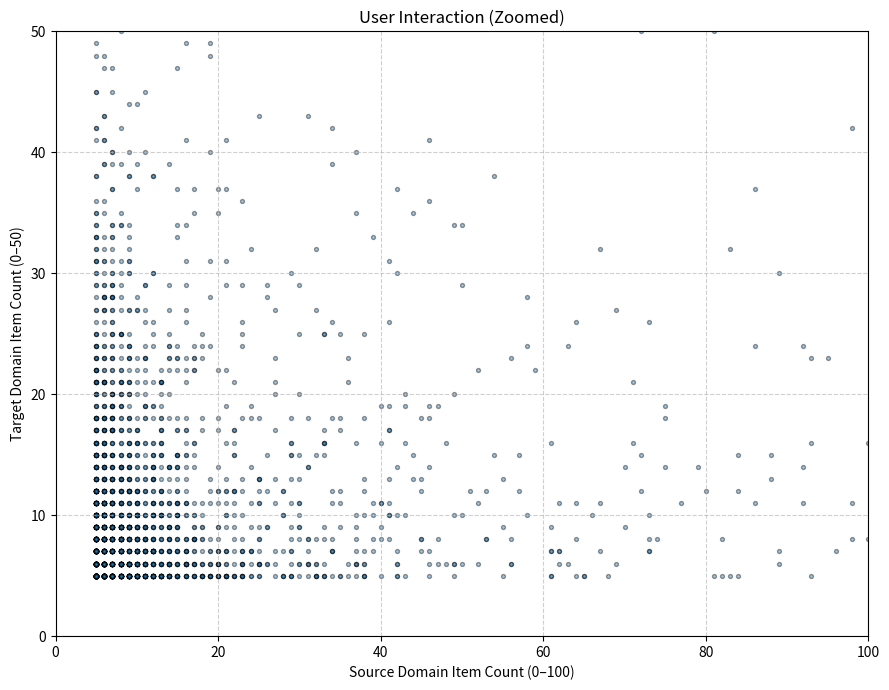

In [ ]:
import matplotlib.pyplot as plt

x = interaction_df['source_count']
y = interaction_df['target_count']

# ① 全範圍：保留極端值
plt.figure(figsize=(9, 7))
plt.scatter(x, y, s=8, edgecolors='k', alpha=0.4)
plt.xlabel('Source Domain Item Count')
plt.ylabel('Target Domain Item Count')
plt.title('User Interaction (Full Range)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ② 放大局部：0–100, 0–50
plt.figure(figsize=(9, 7))
plt.scatter(x, y, s=8, edgecolors='k', alpha=0.4)
plt.xlim(0, 100)
plt.ylim(0, 50)
plt.xlabel('Source Domain Item Count (0–100)')
plt.ylabel('Target Domain Item Count (0–50)')
plt.title('User Interaction (Zoomed)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


📊 皮爾森相關係數: 0.0724, p-value: 1.2350e-04


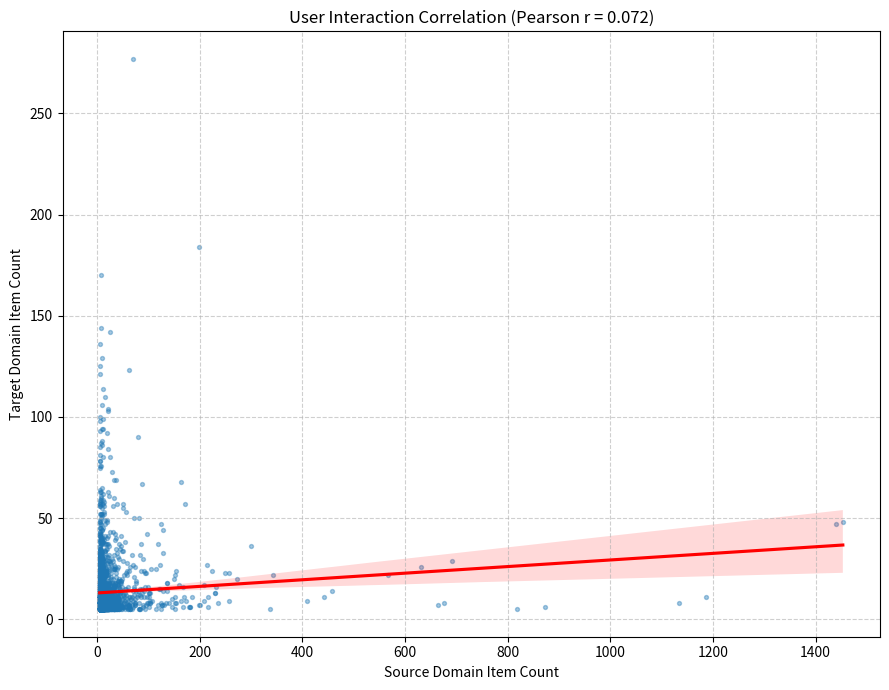

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

x = interaction_df['source_count']
y = interaction_df['target_count']

# 計算皮爾森相關係數
corr, p_value = pearsonr(x, y)
print(f"📊 皮爾森相關係數: {corr:.4f}, p-value: {p_value:.4e}")

# 畫 scatter + 迴歸線
plt.figure(figsize=(9, 7))
sns.regplot(x=x, y=y, scatter_kws={'s':8, 'alpha':0.4}, line_kws={'color':'red'})
plt.xlabel('Source Domain Item Count')
plt.ylabel('Target Domain Item Count')
plt.title(f'User Interaction Correlation (Pearson r = {corr:.3f})')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


📊 Total users: 2809, pages: 6


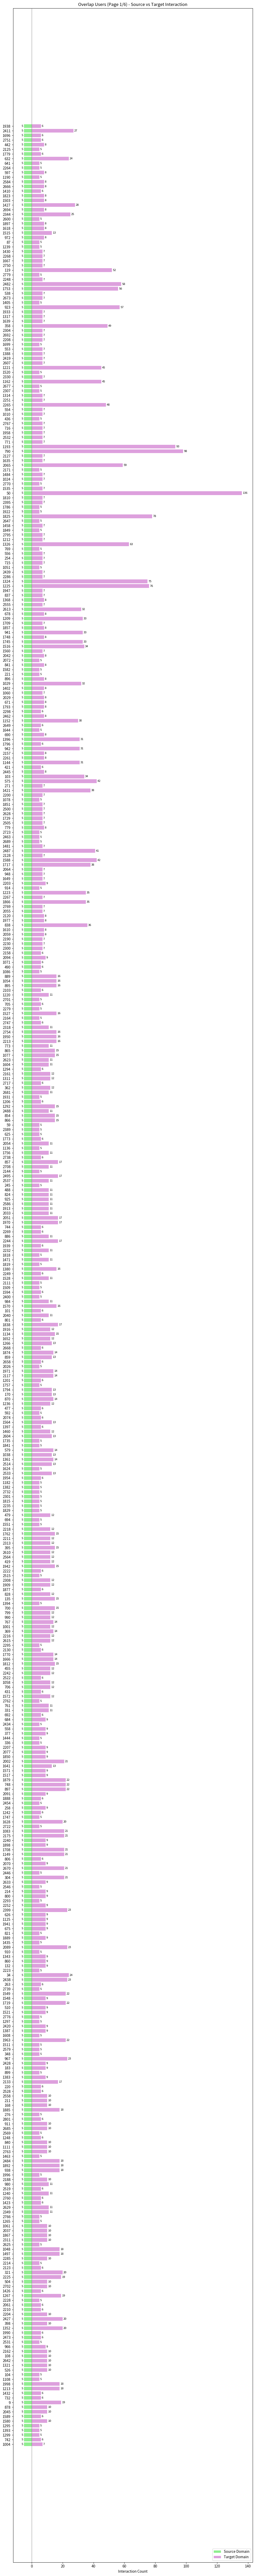

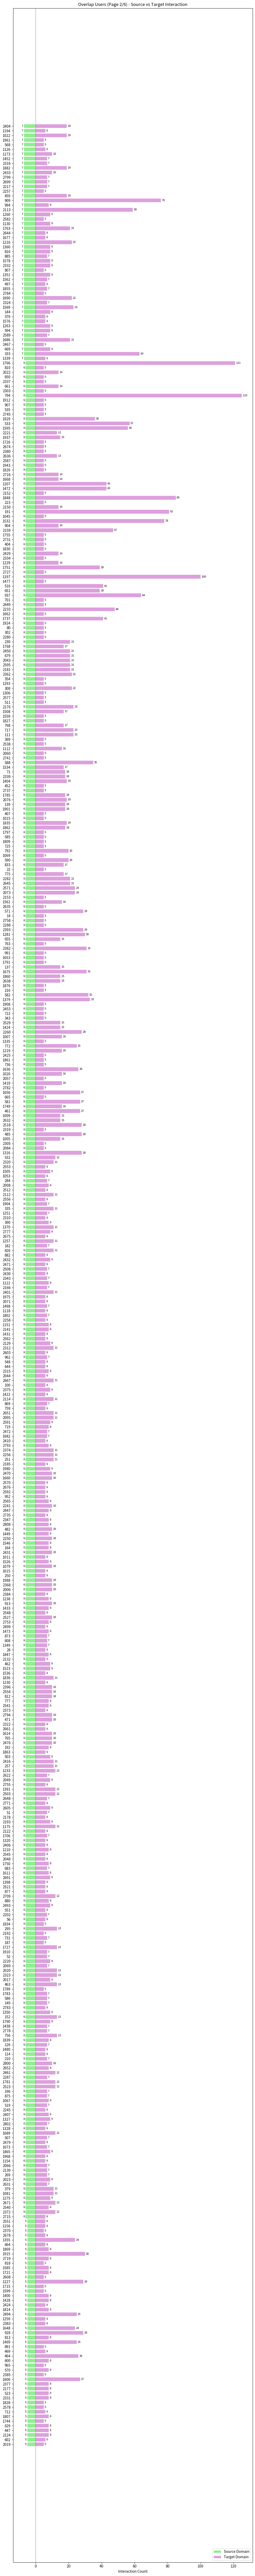

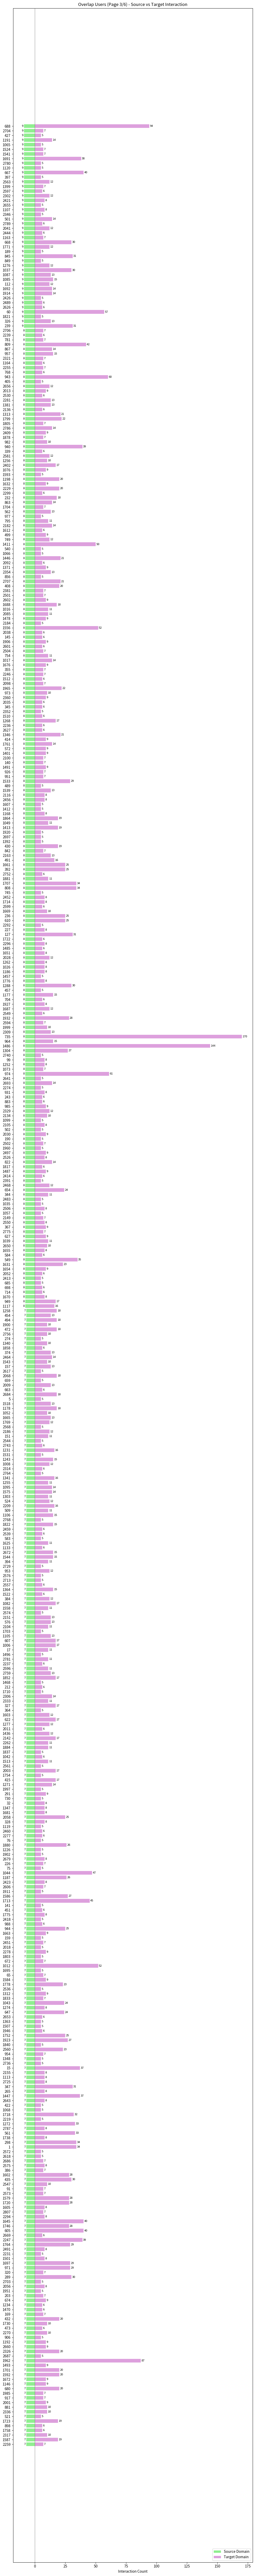

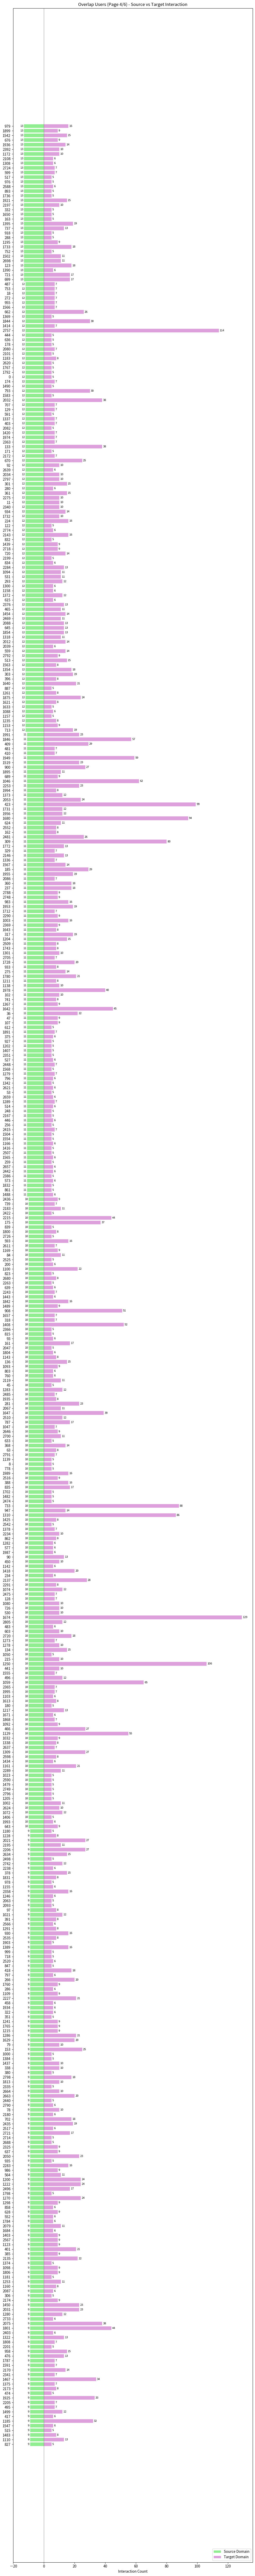

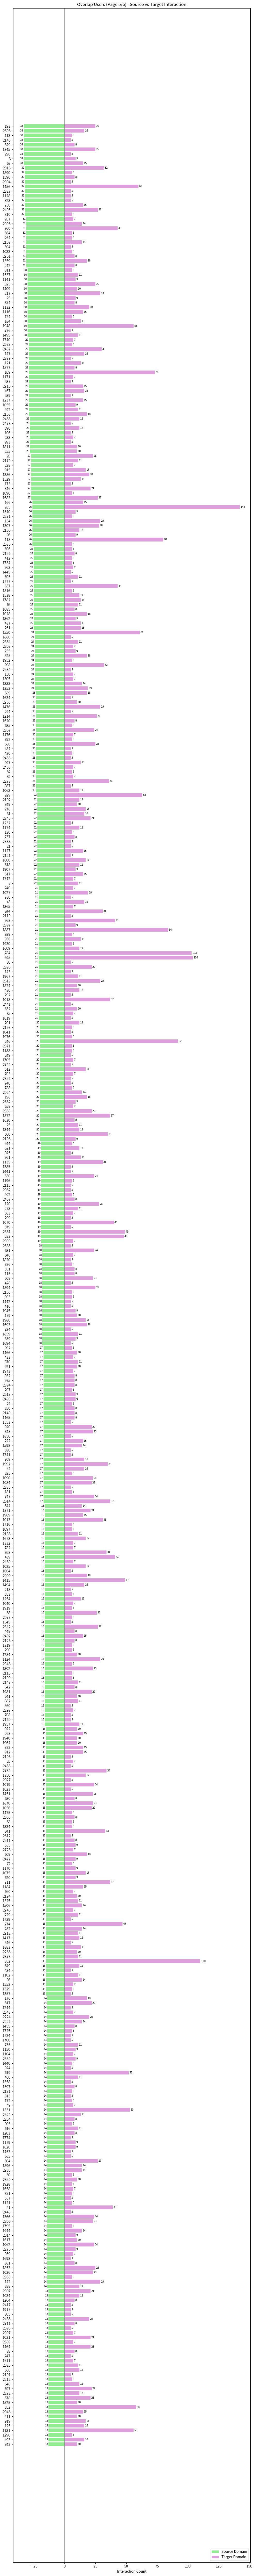

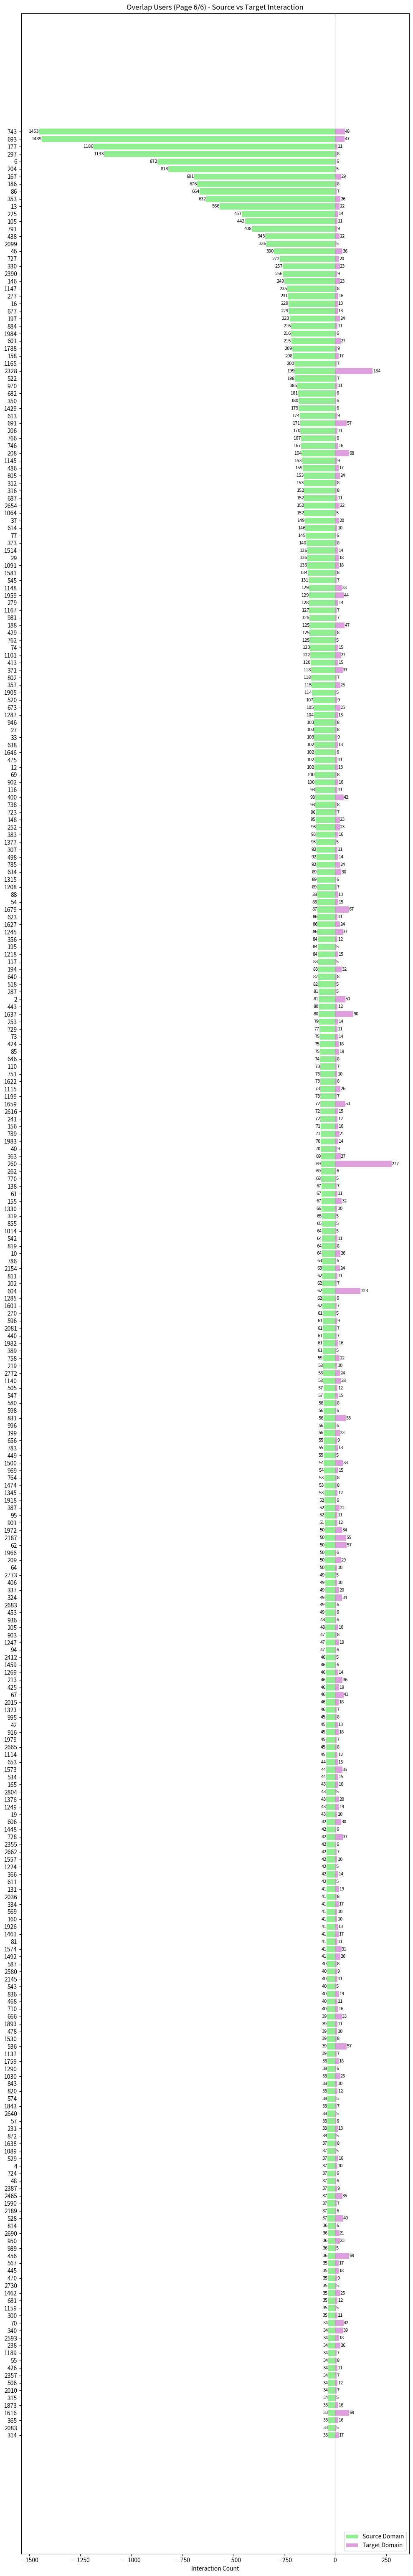

In [ ]:
import matplotlib.pyplot as plt

# 分頁參數
users_per_page = 500
num_users = len(interaction_df)
num_pages = (num_users + users_per_page - 1) // users_per_page

print(f"📊 Total users: {num_users}, pages: {num_pages}")

for page in range(num_pages):
    start = page * users_per_page
    end = min((page + 1) * users_per_page, num_users)
    df_page = interaction_df.iloc[start:end]

    user_ids = df_page.index.tolist()
    y_pos = range(len(user_ids))
    source_values = -df_page['source_count'].values  # 往左畫
    target_values = df_page['target_count'].values   # 往右畫

    fig_height = len(user_ids) * 0.2
    fig, ax = plt.subplots(figsize=(10, fig_height))

    bars_left = ax.barh(y_pos, source_values, color='lightgreen', label='Source Domain')
    bars_right = ax.barh(y_pos, target_values, color='plum', label='Target Domain')

    ax.set_yticks(y_pos)
    ax.set_yticklabels(user_ids)
    ax.axvline(0, color='gray', linewidth=0.8)

    for i, bar in enumerate(bars_left):
        ax.text(bar.get_width() - 0.5, bar.get_y() + bar.get_height() / 2,
                f"{-int(bar.get_width())}", va='center', ha='right', fontsize=8)

    for i, bar in enumerate(bars_right):
        ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
                f"{int(bar.get_width())}", va='center', ha='left', fontsize=8)

    ax.set_xlabel("Interaction Count")
    ax.set_title(f"Overlap Users (Page {page + 1}/{num_pages}) - Source vs Target Interaction")
    ax.legend(loc='lower right')

    plt.tight_layout()
    plt.show()
